# ITS_LIVE Virtual Mosaics Example

In [ ]:
import xarray as xr
import shapely
from virtual_cubes import VirtualDataset

Let's create a "virtual dataset". This is built from a geoparquet catalog with kerchunk references for each granule. 

In [2]:
vds = VirtualDataset("refs_stac_sentinel1/")

We'd like to generate a datacube like structure, so we can query the catalog by space (bounding box polygon) and time range. This example will use the Jakobshavn glacier bounding box.

In [3]:
bbox = shapely.box(-50.147, 69.0875, -48.9844, 69.2358)
ds = vds.build_cubes(bbox, time_range=("2020-01-01", "2020-12-31"))[0]
ds

/Users/goodman/projects/its-live/virtual_cubes_v2.py:198: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds = xr.Dataset(coords=dict(mid_date=time, **out_grid), attrs=attr)


<xarray.Dataset> Size: 2GB
Dimensions:           (mid_date: 689, x: 396, y: 168)
Coordinates:
  * mid_date          (mid_date) datetime64[ns] 6kB 2020-01-01T09:51:57.37742...
  * x                 (x) float64 3kB -2.054e+05 -2.053e+05 ... -1.58e+05
  * y                 (y) float64 1kB -2.264e+06 -2.264e+06 ... -2.284e+06
Data variables:
    chip_size_height  (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    chip_size_width   (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    interp_mask       (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    v                 (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    v_error           (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    vx                (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    vy                (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    M11               (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>
    M12               (mid_date, y, x) float32 183MB dask.array<chunksize=(1, 168, 396), meta=np.ndarray>

Now let's do a quick test of summary statistics for 2020.

CPU times: user 36.4 s, sys: 2.61 s, total: 39 s
Wall time: 29.3 s


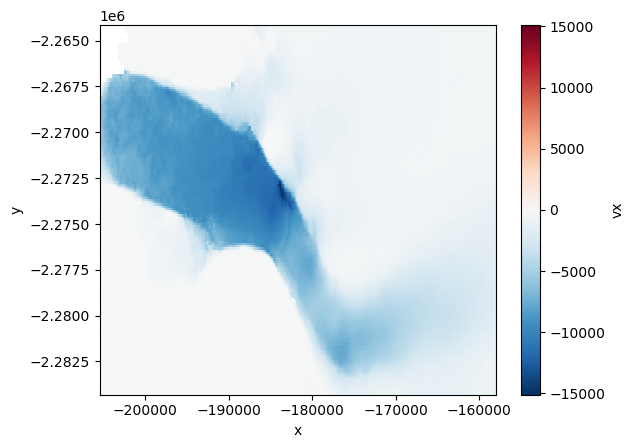

/Users/goodman/opt/envs/itslive/lib/python3.10/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/Users/goodman/opt/envs/itslive/lib/python3.10/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/Users/goodman/opt/envs/itslive/lib/python3.10/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/Users/goodman/opt/envs/itslive/lib/python3.10/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


In [4]:
%%time
vxmean = ds.vx.mean("mid_date").compute()
vxmean.plot()

It should be noted that when a computation is triggered, fetched chunks are saved in memory inside an LRU cache, so each calculation using the same subset of data should be much quicker on subsequent attempts.

CPU times: user 48.3 s, sys: 559 ms, total: 48.9 s
Wall time: 23.6 s


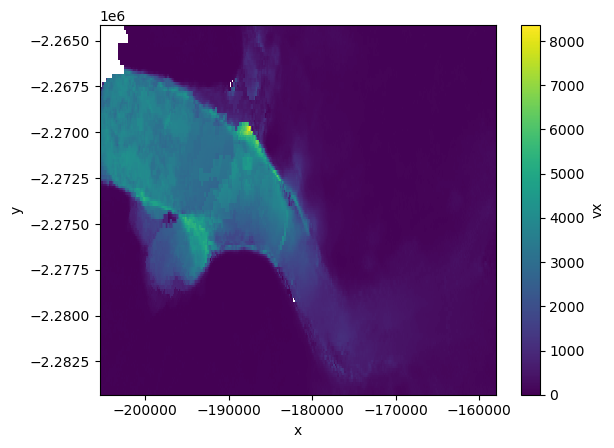

In [5]:
%%time
vxstd = ds.vx.std("mid_date").compute()
vxstd.plot()

CPU times: user 29.2 s, sys: 347 ms, total: 29.6 s
Wall time: 5.04 s


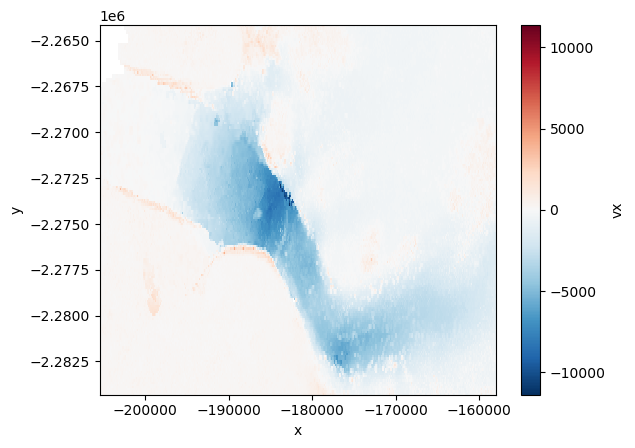

In [8]:
%%time
vxmax = ds.vx.max("mid_date").compute()
vxmax.plot()